In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)

In [2]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_30.csv')
commerce_df = pd.read_csv(basedir + 'commerce_30.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [3]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '거래유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
print(common_df.shape)
common_df.head()

(87439, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대,31.0
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대,32.0
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대,32.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대,30.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대,31.0


In [4]:
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
common_df.head()

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대,31.0
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대,32.0
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대,32.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대,30.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대,31.0


In [5]:
target = '천호동'
target_purpose = '2종일반'
계약일자시점 = 2018

In [6]:
target_df = common_df[(common_df['시군구'].str.contains(target))&(common_df['용도지역'].str.contains(target_purpose))&(common_df['계약날짜'].dt.year >= 계약일자시점)].sort_values(['단가(평)'], ascending=False)
print(target_df.shape)
target_df.head()

(204, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
9727,서울특별시 강동구 천호동,2**,제2종일반주거,25m미만,2021-03-12,194.0,280000.0,1443.298969,4771.236082,상업/업무,38.0
7878,서울특별시 강동구 천호동,3**,제2종일반주거,25m미만,2020-10-23,363.1,394000.0,1085.100523,3587.109033,상업/업무,38.0
7877,서울특별시 강동구 천호동,2**,제2종일반주거,25m미만,2020-10-16,454.2,465000.0,1023.778071,3384.390192,상업/업무,40.0
6261,서울특별시 강동구 천호동,3**,제2종일반주거,25m미만,2019-03-15,563.8,560000.0,993.260021,3283.504079,상업/업무,37.0
25636,서울특별시 강동구 천호동,4**,제2종일반주거지역,-,2018-12-03,44.0,43500.0,988.636364,3268.219261,토지,NaN


In [7]:
#target_df = target_df[target_df['단가(평)'] <= 5000]

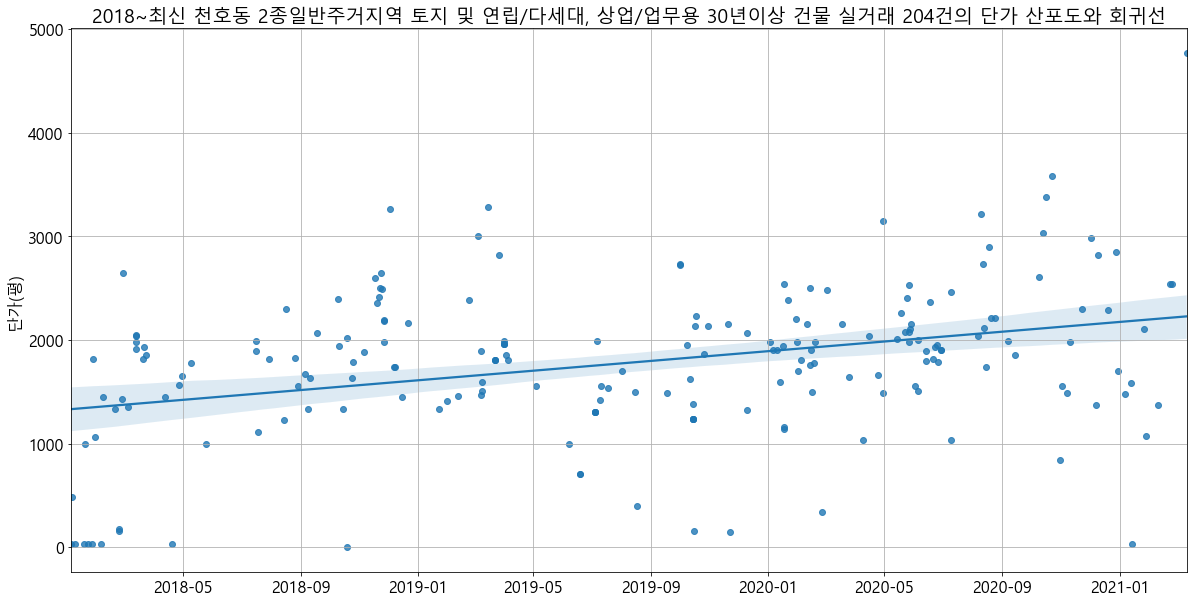

In [9]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('{}~최신 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 산포도와 회귀선'.format(계약일자시점, target, target_purpose, target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['단가(평)'])
plt.savefig(basedir + '{}{}/산포도.png'.format(target, target_purpose))

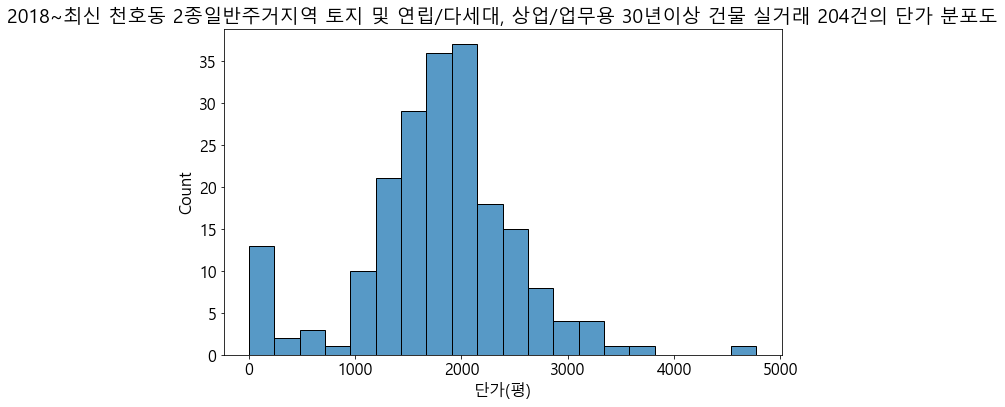

거래량: 204.0
평균: 1781.3344536699108
표준편차: 732.1651763875374
최소: 0.4461248313090418
25분위: 1445.9693061840123
중간값: 1838.8508315113154
75분위: 2152.527172551966
최대: 4771.236082474227


<Figure size 432x288 with 0 Axes>

In [10]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(10,6))
plt.title('{}~최신 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(계약일자시점, target, target_purpose, target_df.shape[0]))
sns.histplot(target_df['단가(평)'])
plt.savefig(basedir + '{}{}/분포도.png'.format(target, target_purpose))
plt.show()
plt.clf()

description = target_df['단가(평)'].describe()
print('거래량:', description['count'])
print('평균:', description['mean'])
print('표준편차:', description['std'])
print('최소:', description['min'])
print('25분위:', description['25%'])
print('중간값:', description['50%'])
print('75분위:', description['75%'])
print('최대:', description['max'])


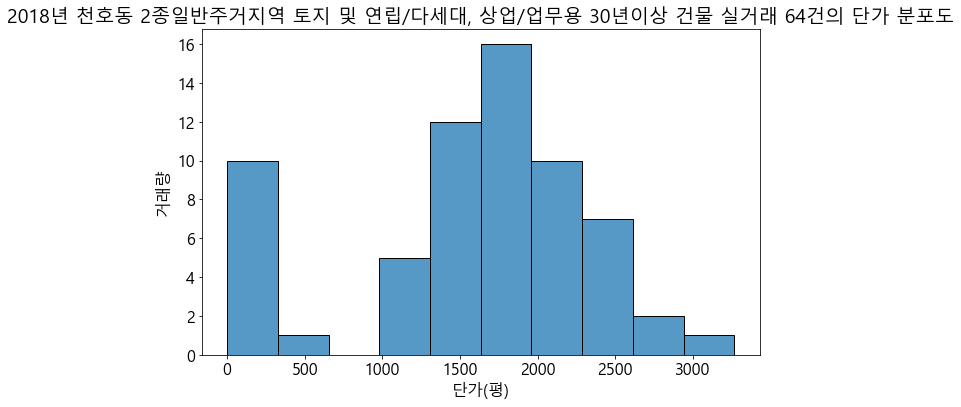

거래량: 64.0
평균: 1551.1726582748597
표준편차: 795.3547338058778
최소: 0.4461248313090418
25분위: 1303.567780182927
중간값: 1756.3083425034783
75분위: 2025.8540764635945
최대: 3268.2192613636366


<Figure size 432x288 with 0 Axes>

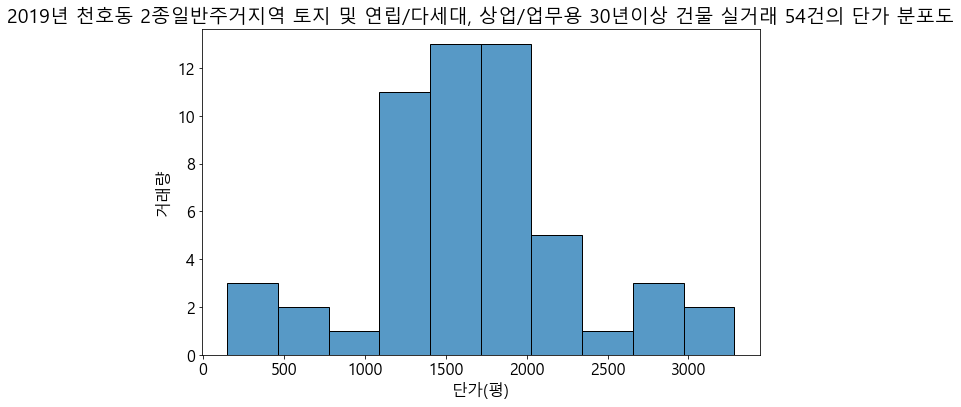

거래량: 54.0
평균: 1657.355789539545
표준편차: 626.6328685926206
최소: 150.3149126901798
25분위: 1312.396645
중간값: 1575.3363975583866
75분위: 1964.8842570281124
최대: 3283.504079460802


<Figure size 432x288 with 0 Axes>

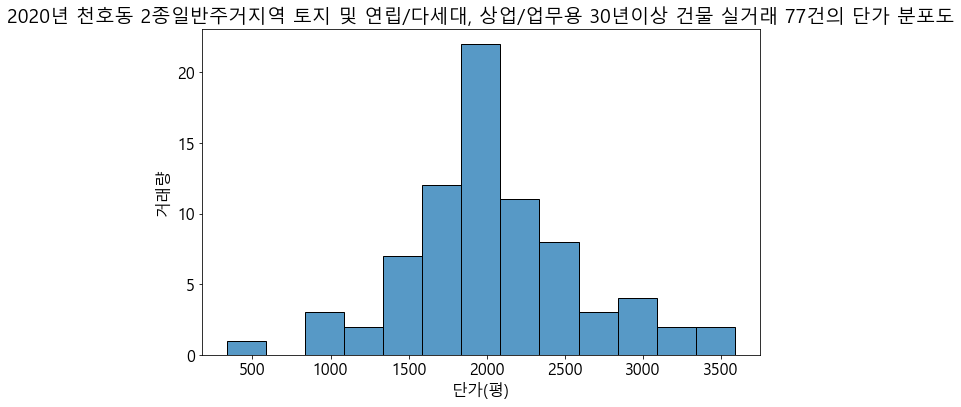

거래량: 77.0
평균: 2040.4363315453897
표준편차: 570.1279128448632
최소: 338.890918762089
25분위: 1763.0853333333337
중간값: 1983.471
75분위: 2296.960116731518
최대: 3587.1090333241536


<Figure size 432x288 with 0 Axes>

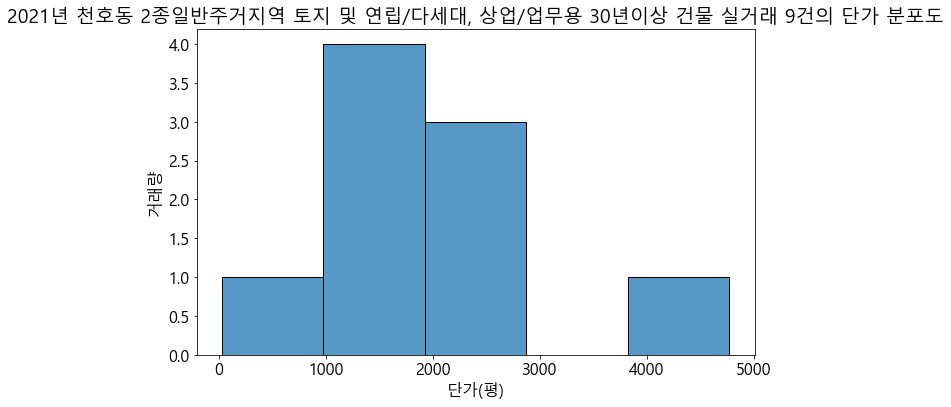

거래량: 9.0
평균: 1945.1520283267087
표준편차: 1314.4443812692564
최소: 28.498146551724144
25분위: 1375.1185524126456
중간값: 1588.753915984336
75분위: 2540.5664002459266
최대: 4771.236082474227


<Figure size 432x288 with 0 Axes>

In [11]:
for year in sorted(target_df['계약날짜'].dt.year.unique()):
    year_df = target_df[target_df['계약날짜'].dt.year == year]
    
    f, ax = plt.subplots(figsize=(10,6))
    plt.title('{}년 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(year, target, target_purpose, year_df.shape[0]))
    plt.ylabel('거래량')
    sns.histplot(year_df['단가(평)'])
    plt.savefig(basedir + '{}{}/{}분포도.png'.format(target, target_purpose, year))
    plt.show()
    plt.clf()
    
    description = year_df['단가(평)'].describe()
    print('거래량:', description['count'])
    print('평균:', description['mean'])
    print('표준편차:', description['std'])
    print('최소:', description['min'])
    print('25분위:', description['25%'])
    print('중간값:', description['50%'])
    print('75분위:', description['75%'])
    print('최대:', description['max'])

In [12]:
target_df = target_df.sort_values(['단가(평)'], ascending=False).reset_index(drop=True)

In [13]:
target_df.head(20)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강동구 천호동,2**,제2종일반주거,25m미만,2021-03-12,194.00,280000.0,1443.298969,4771.236082,상업/업무,38.0
1,서울특별시 강동구 천호동,3**,제2종일반주거,25m미만,2020-10-23,363.10,394000.0,1085.100523,3587.109033,상업/업무,38.0
2,서울특별시 강동구 천호동,2**,제2종일반주거,25m미만,2020-10-16,454.20,465000.0,1023.778071,3384.390192,상업/업무,40.0
3,서울특별시 강동구 천호동,3**,제2종일반주거,25m미만,2019-03-15,563.80,560000.0,993.260021,3283.504079,상업/업무,37.0
4,서울특별시 강동구 천호동,4**,제2종일반주거지역,-,2018-12-03,44.00,43500.0,988.636364,3268.219261,토지,NaN
5,서울특별시 강동구 천호동,3**,제2종일반주거,12m미만,2020-08-10,462.30,450000.0,973.393900,3217.830954,상업/업무,31.0
6,서울특별시 강동구 천호동,4*,제2종일반주거지역,25m미만,2020-04-29,4312.20,4106039.0,952.191225,3147.739468,토지,NaN
7,서울특별시 강동구 천호동,2**,제2종일반주거,25m미만,2020-10-13,185.00,169500.0,916.216216,3028.813824,상업/업무,44.0
8,서울특별시 강동구 천호동,3**,제2종일반주거,25m미만,2019-03-04,317.80,288400.0,907.488987,2999.963480,상업/업무,41.0
9,서울특별시 강동구 천호동,397-419,제2종일반주거지역,25m미만,2020-12-02,71.96,65000.0,903.279600,2986.048152,연립/다세대,34.0


In [14]:
target_df.tail(20)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
184,서울특별시 강동구 천호동,2**,제2종일반주거지역,-,2019-06-07,60.00,18000.0,300.000000,991.735500,토지,NaN
185,서울특별시 강동구 천호동,2**,제2종일반주거지역,-,2020-10-31,13.00,3310.0,254.615385,841.703719,토지,NaN
186,서울특별시 강동구 천호동,1**,제2종일반주거지역,-,2019-06-19,24.00,5160.0,215.000000,710.743775,토지,NaN
187,서울특별시 강동구 천호동,1**,제2종일반주거지역,-,2019-06-19,18.00,3840.0,213.333333,705.234133,토지,NaN
188,서울특별시 강동구 천호동,1**,제2종일반주거지역,-,2018-01-05,17.00,2500.0,147.058824,486.144853,토지,NaN
189,서울특별시 강동구 천호동,1**,제2종일반주거지역,-,2019-08-17,26.00,3100.0,119.230769,394.151288,토지,NaN
190,서울특별시 강동구 천호동,4*,제2종일반주거지역,-,2020-02-26,25.85,2650.0,102.514507,338.890919,토지,NaN
191,서울특별시 강동구 천호동,1**,제2종일반주거지역,-,2018-02-23,192.00,10300.0,53.645833,177.341591,토지,NaN
192,서울특별시 강동구 천호동,1**,제2종일반주거지역,-,2019-10-16,115.68,5600.0,48.409405,160.031086,토지,NaN
193,서울특별시 강동구 천호동,1**,제2종일반주거지역,-,2018-02-23,56.00,2700.0,48.214286,159.386063,토지,NaN


In [15]:
target_df.to_excel('./국토교통부_실거래가_공개시스템/땅값분석/{}{}/{}_{}_땅값분석.xlsx'.format(target, target_purpose, target, target_purpose), index=False)